<a href="https://colab.research.google.com/github/ekqlsrla/ESAA/blob/main/HW/0401_CH02_1_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **[파이썬 머신러닝 완변 가이드 CHAPTER 02 - 사이킷런으로 시작하는 머신러닝]**



> ## **01 사이킷런 소개와 특징**


* 머신러닝을 위한 매우 다양한 알고리즘과 개발을 위한 편리한 프레임워크와 API를 제공     
* 오랜 기간 실전 환경에서 검증됐으며, 매우 많은 환경에서 사용되는 성숙한 라이브러리


In [ ]:
pip install scikit-learn

In [ ]:
#사이킷런 버전 확인
import sklearn

print(sklearn.__version__)

1.0.2


> ## **02 첫번째 머신러닝 만들어 보기 - 붓꽃 품종 예측하기**

1) **`sklearn.datasets`** 사이킷런에서 자체적으로 제공하는 **데이터 세트**를 생성하는 모듈의 모임

2) **`sklearn.tree`** 트리 기반 **ML 알고리즘**을 구현한 클래스의 모임

3) **`sklearn.model_selection`** 학습 데이터와 검증 데이터, 예측 데이터로 데이터를 분리하거나 최적의 하이퍼 파라미터로 평가하기 이한 다양한 모듈의 모임
  - 하이퍼 파라미터 : 머신러닝 알고리즘별로 최적의 학습을 위해 직접 입력하는 파라미터들 통칭

4) **`train_test_split()`** 데이터 세트를 학습 데이터와 테스트 데이터로 분리

In [ ]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
import pandas as pd

#붓꽃 데이터 세트 로딩

iris = load_iris()
iris_data = iris.data

iris_label = iris.target
print('iris target 값 :', iris_label)
print('iris target 명 :', iris.target_names)

#DataFrame 으로 변경
iris_df = pd.DataFrame(data=iris_data, columns = iris.feature_names)
iris_df['label'] = iris.target
iris_df.head(3)

iris target 값 : [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
iris target 명 : ['setosa' 'versicolor' 'virginica']


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0


4) **`train_test_split()`** 데이터 세트를 학습 데이터와 테스트 데이터로 분리
* 학습 데이터로 학습된 모델이 얼마나 **뛰어난 성능을 가지는지 평가**하기 위해서
* `test_size` 전체 데이터 중 **테스트 데이터**로 분리할 비율
* `random_state` 호출할 때 마다 같은 학습/테스트 용 데이터 세트를 생성하기 위해 주어지는 **난수 발생 값**

In [ ]:
X_train , X_test, y_train, y_test = train_test_split(iris_data,iris_label,test_size = 0.2,random_state= 11)

In [ ]:
#DecisionTreeClassifier 객체 생성
dt_clf = DecisionTreeClassifier(random_state=11)
#학습 수행
dt_clf.fit(X_train,y_train)

DecisionTreeClassifier(random_state=11)

In [ ]:
# 학습이 완료된 DecisionTreeClassifier 객체에서 테스트 데이터 세트로 예측 수행
pred = dt_clf.predict(X_test)

In [ ]:
#머신러닝 모델의 성능 평가

from sklearn.metrics import accuracy_score
print('예측 정확도 : {0:.4f}'.format(accuracy_score(y_test,pred)))

예측 정확도 : 0.9333


> ## **03 사이킷런의 기반 프레임워크 익히기**

### 1. Estimator 이해 및 fit(), predict() 메서드

  1) **fit()** : ML 모델 학습 / **predict()** : 학습된 모델 예측

  2) **Estimator**

  * **Classifier** : 분류 알고리즘을 구현한 클래스  
     
  * **Regressor** : 회귀 알고리즘을 구현한 클래스

### 2. 사이킷런의 주요 모듈

1) **예제 데이터** - `sklearn.datasets`

  2) **피처 처리**
 * `sklearn.preprocessing` 데이터 전처리
 * `sklearn.feature_selection` 셀렉션 작업 수행
 * `skleran.feature_extraction` 텍스트/이미지 데이터의 벡터화된 피처 추출

3) **피처 처리 & 차원 축소**
 * `sklearn.decomposition` 차원 축소 알고리즘 모듈

4) **데이터 분리. 검증& 파라미터 튜닝**
 * `sklearn.model_selection` 교차 검증을 위한 데이터 분리,최적 파라미터 추출 등의 API 제공

5) **평가**
 * `sklearn.metrics` 성능 측정 방법 제공
 
6) **ML알고리즘**
 *  `sklearn.ensemble` 앙상블 알고리즘 제공
 * `sklearn.linear_model` 회귀 관련 알고리즘 제공
 * `sklearn.naive_bayes` 나이브 베이즈 알고리즘 제공
 * `sklearn.neighbors` 최근접 이웃 알고리즘 제공
 * `sklearn.svm` 서포트 벡터 머신 알고리즘 제공
 * `sklearn.tree` 의사 결정 트리 알고리즘 제공
 * `sklearn.cluster` 비지도 클러스터리 알고리즘 지공
 
7) **유틸리티**
 * `sklearn.pipeline` 피처 처리 등 변환과 ML알고리즘 학습, 예측을 함께 묶어서 실행


### 3. 내장된 예제 데이터 세트

1) **fetch** 계열 명령 : 인터넷에서 내려받아 홈 디렉터리 아래의 scikit_learn_data 라는 서브 디렉터리에 저장 후 불러들이는 데이터

2) 분류와 클러스터링을 위한 표본 데이터 생성기

* `datasets.make_classifications()`  분류를 위한 데이터 세트 생성
* `datasets.make_blobs()`  클러스터링을 위한 데이터 세트 무작위 생성

3) 딕셔너리 형태 **데이터 세트의 키**
* data : 피처의 데이터 세트
* target : 분류 시 레이블 값, 회귀일 때는 숫자 결괏값 데이터 세트
* target_names : 개별 레이블의 이름
* feature_names : 피처의 이름
* DESCR : 데이터 세트에 대한 설명과 각 피처의 설명





In [ ]:
from sklearn.datasets import load_iris

iris_data = load_iris()
print(type(iris_data))

#Bunch 클래스는 파이썬 딕셔너리 자료형과 유사함

<class 'sklearn.utils.Bunch'>


In [ ]:
keys = iris_data.keys()
print('붓꽃 데이터 세트의 키들 : ',keys)

붓꽃 데이터 세트의 키들 :  dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])


In [ ]:
print('\n feature_names의 type : ', type(iris_data.feature_names))
print(' feature_names의 shape : ', len(iris_data.feature_names))
print(iris_data.feature_names)

print('\n target_names의 type :', type(iris_data.target_names))
print(' target_names의 shape :', len(iris_data.target_names))
print(iris_data.target_names)

print('\n data의 type :', type(iris_data.data))
print(' data의 shape :', iris_data.data.shape)
print(iris_data['data'])

print('\n target의 type :', type(iris_data.target))
print(' target의 shape : ', iris_data.target.shape)
print(iris_data.target)


 feature_names의 type :  <class 'list'>
 feature_names의 shape :  4
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']

 target_names의 type : <class 'numpy.ndarray'>
 target_names의 shape : 3
['setosa' 'versicolor' 'virginica']

 data의 type : <class 'numpy.ndarray'>
 data의 shape : (150, 4)
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.2]
 [5.  3.2 1.2 

> ## **04 Model Selection 모듈 소개**

### 1. 학습/테스트 데이터 세트 분리 - train_test_split



In [ ]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

iris = load_iris()
dt_clf = DecisionTreeClassifier()
train_data = iris.data
train_label = iris.target
dt_clf.fit(train_data,train_label)

#학습 데이터 세트로 예측 수행 : 이미 학습한 데이터로 수행했기에 정확도 100%

pred = dt_clf.predict(train_data)
print('예측 정확도 :', accuracy_score(train_label,pred))

예측 정확도 : 1.0


### **2. train_test_split()** 

*   `test_size` 전체 데이터에서 **테스트 데이터 세트** 크기를 얼마로 샘플링 할 지 결정
* `train_size` 전체 데이터에서 **학습용 데이터 세트** 크기를 얼마로 샘플링 할 지 결정
* `shuffle` 데이터를 분리하기 전에 미리 섞을 지 결정
* `random_state` 호출할 때 마다 **동일한 학습/테스트 용 데이터 세트**를 생성하기 위해 주어지는 난수 값



In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

dt_clf = DecisionTreeClassifier()
iris_data = load_iris()

X_train, X_test, y_train, y_test = train_test_split(iris_data.data,iris_data.target, test_size = 0.3, random_state = 121)

In [ ]:
#예측 정확도 측정

dt_clf.fit(X_train, y_train)
pred = dt_clf.predict(X_test)
print('예측 정확도 : {0:.4f}'.format(accuracy_score(y_test,pred)))

예측 정확도 : 0.9556


### 3. 교차 검증
: **데이터 편중을 막기 위해서** 별도의 여러 세트로 구성된 학습 데이터 세트와 검증 데이터 세트에서 학습과 평가 수행

1) K 폴드 교차 검증 : K개의 데이터 폴드 세트를 만들어서 **K번만큼** 각 폴드 세트에 학습과 검증 평가를 반복적으로 수행하는 방법

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold
import numpy as np

iris = load_iris()
features = iris.data
label = iris.target
dt_clf = DecisionTreeClassifier(random_state=156)

#5개의 폴드 세트로 분리하는 KFold 객체와 폴드 세트별 정확도를 담을 리스트 객체 생성
kfold = KFold(n_splits = 5)
cv_accuracy = []
print('붓꽃 데이터 세트 크기 :',features.shape[0])

붓꽃 데이터 세트 크기 : 150


In [ ]:
n_iter = 0

for train_index, test_index in kfold.split(features) :
  #학습용, 검증용 테스트 데이터 추출
  X_train, X_test = features[train_index], features[test_index]
  y_train, y_test = label[train_index], label[test_index]
  #학습 및 예측
  dt_clf.fit(X_train,y_train)
  pred = dt_clf.predict(X_test)
  n_iter += 1
  accuracy = np.round(accuracy_score(y_test,pred),4)
  train_size = X_train.shape[0]
  test_size = X_test.shape[0]
  print('\n#{0} 교차 검증 정확도 : {1} , 학습 데이터 크기 : {2}, 검증 데이터 크기 : {3}'.format(n_iter,accuracy,train_size,test_size))
  print('#{0} 검증 세트 인덱스 :{1}'.format(n_iter,test_index))
  cv_accuracy.append(accuracy)

#개별 iteration별 정확도를 합하여 평균 정확도 계산
print('\n##평균 검증 정확도 :', np.mean(cv_accuracy))


 #1 교차 검증 정확도 : 1.0 , 학습 데이터 크기 : 120, 검증 데이터 크기 : 30
#1 검증 세트 인덱스 :[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29]

 #2 교차 검증 정확도 : 0.9667 , 학습 데이터 크기 : 120, 검증 데이터 크기 : 30
#2 검증 세트 인덱스 :[30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53
 54 55 56 57 58 59]

 #3 교차 검증 정확도 : 0.8667 , 학습 데이터 크기 : 120, 검증 데이터 크기 : 30
#3 검증 세트 인덱스 :[60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83
 84 85 86 87 88 89]

 #4 교차 검증 정확도 : 0.9333 , 학습 데이터 크기 : 120, 검증 데이터 크기 : 30
#4 검증 세트 인덱스 :[ 90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119]

 #5 교차 검증 정확도 : 0.7333 , 학습 데이터 크기 : 120, 검증 데이터 크기 : 30
#5 검증 세트 인덱스 :[120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137
 138 139 140 141 142 143 144 145 146 147 148 149]

##평균 검증 정확도 : 0.9


2) Stratified K폴드 : **불균형한 분포도**를 가진 레이블 데이터 집합을 위한 K 폴드 방식

* K폴드가 레이블 데이터 집합이 원본 데이터 집합의 레이블 분호를 학습 및 테스트 세트에 **제대로 분배하지 못하는 경우**의 문제 해결   
* split() 메서드에 인자로 피처 데이터 세트뿐만 아니라 **레이블 데이터 세트도 필요**


In [ ]:
import pandas as pd

iris = load_iris()
iris_df = pd.DataFrame(data=iris.data, columns = iris.feature_names)
iris_df['label'] = iris.target
iris_df['label'].value_counts()

0    50
1    50
2    50
Name: label, dtype: int64

In [ ]:
from sklearn.model_selection import StratifiedKFold

skf = StratifiedKFold(n_splits = 3)
n_iter = 0

for train_index, test_index in skf.split(iris_df,iris_df['label']) :
  n_iter += 1
  label_train = iris_df['label'].iloc[train_index]
  label_test = iris_df['label'].iloc[test_index]
  print('##교차 검증 : {0}'.format(n_iter))
  print('학습 레이블 데이터 분포 :\n', label_train.value_counts())
  print('검증 레이블 데이터 분포 :\n', label_test.value_counts())

##교차 검증 : 1
학습 레이블 데이터 분포 :
 2    34
0    33
1    33
Name: label, dtype: int64
검증 레이블 데이터 분포 :
 0    17
1    17
2    16
Name: label, dtype: int64
##교차 검증 : 2
학습 레이블 데이터 분포 :
 1    34
0    33
2    33
Name: label, dtype: int64
검증 레이블 데이터 분포 :
 0    17
2    17
1    16
Name: label, dtype: int64
##교차 검증 : 3
학습 레이블 데이터 분포 :
 0    34
1    33
2    33
Name: label, dtype: int64
검증 레이블 데이터 분포 :
 1    17
2    17
0    16
Name: label, dtype: int64


In [ ]:
df_clf = DecisionTreeClassifier(random_state=156)

skfold = StratifiedKFold(n_splits = 3)
n_iter = 0
cv_accuracy = []

for train_index, test_index in skfold.split(features, label) :
  X_train,X_test = features[train_index],features[test_index]
  y_train, y_test = label[train_index], label[test_index]
  dt_clf.fit(X_train,y_train)
  pred = dt_clf.predict(X_test)

  n_iter += 1
  accuracy = np.round(accuracy_score(y_test,pred),4)
  train_size = X_train.shape[0]
  test_size = X_test.shape[0]
  print('\n#{0} 교차 검증 정확도 : {1}, 학습 데이터 크기 : {2} , 검증 데이터 크기 : {3}'.format(n_iter,accuracy,train_size,test_size))
  print('#{0} 검증 세트 인덱스 : {1}'.format(n_iter,test_index))
  cv_accuracy.append(accuracy)

  #교차 검증별 정확도 및 평균 정확도 계산
  print('\n## 교차 검증별 정확도 :',np.round(cv_accuracy,4))
  print('## 평균 검증 정확도 :', np.mean(cv_accuracy))



#1 교차 검증 정확도 : 0.98, 학습 데이터 크기 : 100 , 검증 데이터 크기 : 50
#1 검증 세트 인덱스 : [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  50
  51  52  53  54  55  56  57  58  59  60  61  62  63  64  65  66 100 101
 102 103 104 105 106 107 108 109 110 111 112 113 114 115]

## 교차 검증별 정확도 : [0.98]
## 평균 검증 정확도 : 0.98

#2 교차 검증 정확도 : 0.94, 학습 데이터 크기 : 100 , 검증 데이터 크기 : 50
#2 검증 세트 인덱스 : [ 17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  67
  68  69  70  71  72  73  74  75  76  77  78  79  80  81  82 116 117 118
 119 120 121 122 123 124 125 126 127 128 129 130 131 132]

## 교차 검증별 정확도 : [0.98 0.94]
## 평균 검증 정확도 : 0.96

#3 교차 검증 정확도 : 0.98, 학습 데이터 크기 : 100 , 검증 데이터 크기 : 50
#3 검증 세트 인덱스 : [ 34  35  36  37  38  39  40  41  42  43  44  45  46  47  48  49  83  84
  85  86  87  88  89  90  91  92  93  94  95  96  97  98  99 133 134 135
 136 137 138 139 140 141 142 143 144 145 146 147 148 149]

## 교차 검증별 정확도 : [0.98 0.94 0.98]
## 평균 검증 정확도 : 0.9666666666666667


3) 교차 검증을 보다 간편하게 - **cross_val_score()**

: <폴드 세트 설정 - for 루프로 학습 및 테스트 데이터의 인덱스 추출 - 반복적으로 학습과 예측 수행하고 예측 성능 반환> 과정을 한꺼번에 수행해주는 API

    cross_val_score (estimator, X, y = None, scoring = None, cv = None, n_jobs = 1, verbose = 0, fit_parmas = None, pre_dispatch='2*n_jobs')

* `estimator` | 분류 알고리즘 / 회귀 알고리즘 클래스
* `X` | 피처 데이터 세트
* `y` | 레이블 데이터 세트
* `scoring` | 예측 성능 평가 지표 기술
* `cv` | 교차 검증 폴드 수 


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.datasets import load_iris

iris_data = load_iris()
dt_clf = DecisionTreeClassifier(random_state = 156)

data = iris_data.data
label = iris_data.target

#성능 지표는 정확도, 교촤 검증 세트는 3개
scores = cross_val_score(dt_clf,data,label,scoring = 'accuracy',cv = 3)
print('교차 검증별 정확도 :', np.round(scores,4))
print('평균 검증 정확도 :', np.round(np.mean(scores),4))

교차 검증별 정확도 : [0.98 0.94 0.98]
평균 검증 정확도 : 0.9667


###4. GridSearchCV - 교차 검증과 하이퍼 파라미터 튜닝을 한 번에

: 교차 검증을 기반으로 하여 하이퍼 파라미터의 최적 값 찾게 해줌
 
 * `estimator` | claaifier, regressor,pipeline
 * `param_grid` | key + 리스트 값을 가지는 딕셔너리 주어짐
 * `scoring` | 예측 성능을 측정할 평가 방법 지정
 * `cv` | 교차 검증을 위해 분할되는 학습/테스트 세트의 개수 지정
 * `refit` | True로 생성 시 가장 최적의 하이퍼 파라미터를 찾은뒤 입력된 estimator 객체를 해당 하이퍼 파라미터로 재학습

In [ ]:
grid_parameters = {'max_depth' : [1,2,3],
                   'min_samples_split': [2,3]
                  }

In [ ]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

#학습 데이터와 테스트 데이터 분리
iris = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris_data.data, iris_data.target,test_size = 0.2,random_state = 121)
dtree = DecisionTreeClassifier()

#파라미터를 딕셔너리 형태로 설정
parameters = {'max_depth' : [1,2,3], 'min_samples_split' : [2,3]}

* 주요 칼럼별 의미
 - params : 수행할 때 마다 적용된 개별 하이퍼 파라미터값
 - rank_test_score : 하이퍼 파라미터별로 성능이 좋은 score 순위
 - mean_test_score : 개별 하이퍼 파라미터별로 CV의 폴딩 테스트 세트에 대해 총 수해한 평가 평균값

In [ ]:
import pandas as pd

#param_grid의 하이퍼 파라미터를 3개의 train,test set fold로 나누어 테스트 수행 설정
grid_dtree = GridSearchCV(dtree,param_grid = parameters, cv = 3, refit = True)

#param_grid 하이퍼 파라미터를 순차적으로 학습/평가
grid_dtree.fit(X_train, y_train)

#결과를 추출해 DataFrame으로 변환
scores_df = pd.DataFrame(grid_dtree.cv_results_)
scores_df[['params','mean_test_score','rank_test_score','split0_test_score','split1_test_score','split2_test_score']]

,params,mean_test_score,rank_test_score,split0_test_score,split1_test_score,split2_test_score
0,"{'max_depth': 1, 'min_samples_split': 2}",0.700000,5,0.700,0.7,0.70
1,"{'max_depth': 1, 'min_samples_split': 3}",0.700000,5,0.700,0.7,0.70
2,"{'max_depth': 2, 'min_samples_split': 2}",0.958333,3,0.925,1.0,0.95
3,"{'max_depth': 2, 'min_samples_split': 3}",0.958333,3,0.925,1.0,0.95
4,"{'max_depth': 3, 'min_samples_split': 2}",0.975000,1,0.975,1.0,0.95
5,"{'max_depth': 3, 'min_samples_split': 3}",0.975000,1,0.975,1.0,0.95


In [ ]:
print('GridSearchCV 최적 파라미터 :', grid_dtree.best_params_)
print('GridSerachCV 최고 정확도 : {0:.4f}'.format(grid_dtree.best_score_))

GridSearchCV 최적 파라미터 : {'max_depth': 3, 'min_samples_split': 2}
GridSerachCV 최고 정확도 : 0.9750


In [ ]:
#refit으로 이미 학습된 estimator 반환
estimator = grid_dtree.best_estimator_

#best_estimator_는 이미 최적 학습이 됐으므로 별도 학습이 필요 없음
pred = estimator.predict(X_test)
print('테스트 데이터 세트 정확도 : {0:4f}'.format(accuracy_score(y_test,pred)))

테스트 데이터 세트 정확도 : 0.966667


> ## **05 데이터 전처리**

### 1. 데이터 인코딩

1) **레이블 인코딩** : 카테고리 피처를 코드형 숫자 값으로 변환
  * 숫자 값의 경우 크고 작음에 대한 특성이 작용하여 **예측 성능이 떨어지는 경우** 발생 -> **선형 회귀와 같은 ML 알고리즘 X / 트리 계열의 ML 알고리즘 O**

In [ ]:
from sklearn.preprocessing import LabelEncoder

items = ['TV','냉장고','전자레인지','컴퓨터','선풍기','선풍기','믹서','믹서']

#LabelEncoder를 객체로 생성한 후, fit()과 transform()으로 레이블 인코딩 수행
encoder = LabelEncoder()
encoder.fit(items)
labels = encoder.transform(items)
print('인코딩 변환값 : ',labels)

인코딩 변환값 :  [0 1 4 5 3 3 2 2]


In [ ]:
#문자열 값이 어떤 숫자 값으로 인코딩 됐는지 확인
print('인코딩 클래스 :',encoder.classes_)

인코딩 클래스 : ['TV' '냉장고' '믹서' '선풍기' '전자레인지' '컴퓨터']


In [ ]:
print('디코딩 원본값 :', encoder.inverse_transform([4,5,0,1,1,3,3]))

디코딩 원본값 : ['전자레인지' '컴퓨터' 'TV' '냉장고' '냉장고' '선풍기' '선풍기']


2) **원-핫 인코딩(One-Hot Encoding)** : 피처 값의 유형에 따라 새로운 피처를 추가해 **고유 값에 해당하는 칼럼에만 1을 표시**하고 나머지 칼럼에는 0을 표시하는 방식

* 주의점 : 변환하기 전에 모든 문자열 값이 숫자형 값으로 변환돼야 하며, 입력 값으로 2차원 데이터가 필요함
* 더 쉽게 지원하는 API `get_dummies()`

In [ ]:
from sklearn.preprocessing import OneHotEncoder
import numpy as np

iitems = ['TV','냉장고','전자레인지','컴퓨터','선풍기','선풍기','믹서','믹서']

encoder = LabelEncoder()
encoder.fit(items)
labels = encoder.transform(items)

#2차원 데이터로 변환
labels = labels.reshape(-1,1)

#원-핫 인코딩
oh_encoder = OneHotEncoder()
oh_encoder.fit(labels)
oh_labels = oh_encoder.transform(labels)
print('원 - 핫 인코딩 데이터')
print(oh_labels.toarray())
print('원 - 핫 인코딩 데이터 차원')
print(oh_labels.shape)

원 - 핫 인코딩 데이터
[[1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0.]]
원 - 핫 인코딩 데이터 차원
(8, 6)


In [ ]:
#get_dummies()

df = pd.DataFrame({'items' : ['TV','냉장고','전자레인지','컴퓨터','선풍기','선풍기','믹서','믹서']})
pd.get_dummies(df)

,items_TV,items_냉장고,items_믹서,items_선풍기,items_전자레인지,items_컴퓨터
0,1,0,0,0,0,0
1,0,1,0,0,0,0
2,0,0,0,0,1,0
3,0,0,0,0,0,1
4,0,0,0,1,0,0
5,0,0,0,1,0,0
6,0,0,1,0,0,0
7,0,0,1,0,0,0


### 2. 피처 스케일링과 정규화


1)  **피처 스케일링** : 서로 다른 변수의 값 범위를 일정한 수준으로 맞추는 작업
* 표준화 : 데이터의 피처 각각이 **평균이 0이고 분산이 1**인 가우시안 정규 분포를 가진 값으로 변환

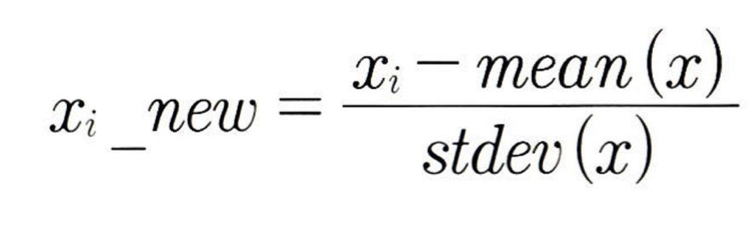
* 정규화 : 서로 다른 피처의 **크기를 통일**하기 위해 크기를 변환주는 개념

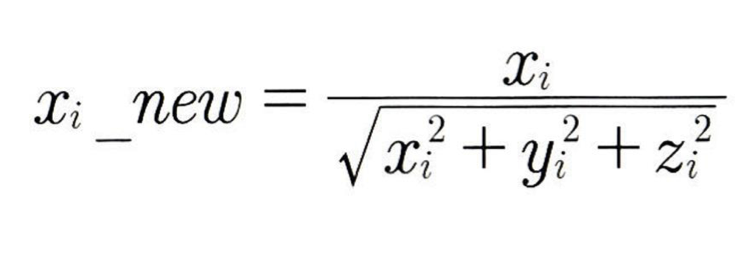



### 2. StandardScaler : 표준화를 쉽게 지원하기 위한 클래스


In [60]:
from sklearn.datasets import load_iris
import pandas as pd

#데이터 세트 로딩 후 데이터프레임으로 변환
iris = load_iris()
iris_data = iris.data
iris_df = pd.DataFrame(data=iris_data,columns = iris.feature_names)

print('feature 들의 평균 값')
print(iris_df.mean())
print('\nfeature 들의 분산 값')
print(iris_df.var())

feature 들의 평균 값
sepal length (cm)    5.843333
sepal width (cm)     3.057333
petal length (cm)    3.758000
petal width (cm)     1.199333
dtype: float64

feature 들의 분산 값
sepal length (cm)    0.685694
sepal width (cm)     0.189979
petal length (cm)    3.116278
petal width (cm)     0.581006
dtype: float64


In [63]:
from sklearn.preprocessing import StandardScaler

#StandardSclaer 작성
scaler = StandardScaler()
#데이터 세트 변환 / fit과 transform 호출
scaler.fit(iris_df)
iris_scaled = scaler.transform(iris_df)

#데이터 프레임으로 변환
iris_df_scaled = pd.DataFrame(data=iris_scaled, columns = iris.feature_names)
print('feature 들의 평균 값')
print(iris_df_scaled.mean())
print('\n feature 들의 분산 값')
print(iris_df_scaled.var())

feature 들의 평균 값
sepal length (cm)   -1.690315e-15
sepal width (cm)    -1.842970e-15
petal length (cm)   -1.698641e-15
petal width (cm)    -1.409243e-15
dtype: float64

 feature 들의 분산 값
sepal length (cm)    1.006711
sepal width (cm)     1.006711
petal length (cm)    1.006711
petal width (cm)     1.006711
dtype: float64


### 3. MinMaxScaler
: 데이터 값을 0과 1사이의 범위 값으로 변환 (음수 값이 있으면 -1 ~ 1)

In [68]:
from sklearn.preprocessing import MinMaxScaler

#MinMaxScaler 객체 생성
scaler = MinMaxScaler ()
#MinMaxScaler로 데이터 세트 변환. fit과 transform 호출
scaler.fit(iris_df)
iris_scaled = scaler.transform(iris_df)

# 데이터 프레임으로 변환
iris_df_scaled = pd.DataFrame(data=iris_scaled, columns = iris.feature_names)
print('feature들의 최솟값')
print(iris_df_scaled.min())
print('\nfeature들의 최댓값')
print(iris_df_scaled.max())

feature들의 최솟값
sepal length (cm)    0.0
sepal width (cm)     0.0
petal length (cm)    0.0
petal width (cm)     0.0
dtype: float64

feature들의 최댓값
sepal length (cm)    1.0
sepal width (cm)     1.0
petal length (cm)    1.0
petal width (cm)     1.0
dtype: float64


### 4. 학습데이터와 테스트 데이터의 스케일링 변환 시 유의점

* 학습 데이터로 fit()이 적용된 **스케일링 기준 정보를 그대로** 테스트 데이터에 적용해야 함.
* 테스트 데이터에 fit을 적용해서는 안 되며 **학습 데이터로 이미 fit이 적용된 Scaler 객체**를 이용해 transform으로 변환

1) `fit_transform()` | fit과 transform을 순차적으로 수행하는 메소드이므로 ***테스트 데이터에서는 절대 사용해서는 안됨***

**<요약>**
1. 가능하다면 전체 데이터의 스케일링 변환을 적용한 뒤 학습과 테스트 데이터로 분리
2. 1이 여의치 않다면 테스트 데이터 변환 시에는 fit이나 fit_tansform을 적용하지 않고 학습 데이터로 이미 fit된 Sclaer 객체를 이용해 transform으로 변환

In [70]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np

#학습 데이터는 [0,10], 테스트 데이터는 [0,5]
#Scaler 클래스의 fit(), transform()은 2차원 이상 데이터만 가능
train_array = np.arange(0,11).reshape(-1,1)
test_array = np.arange(0,6).reshape(-1,1)

In [72]:
scaler = MinMaxScaler()

#fit하게 되면 train_array데이터의 최솟값이 0, 최댓값이 10으로 설정
scaler.fit(train_array)

#1/10 scale로 데이터 변환. 원본 10->1로 변환
train_scaled = scaler.transform(train_array)

print('원본 train_array 데이터:', np.round(train_array.reshape(-1),2))
print('Scale된 train_array 데이터 :', np.round(train_scaled.reshape(-1),2))

원본 train_array 데이터: [ 0  1  2  3  4  5  6  7  8  9 10]
Scale된 train_array 데이터 : [0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]


In [74]:
scaler.fit(test_array)

#1/5scale로 데이터 변환. 원본 5->1로 변환
test_scaled = scaler.transform(test_array)

print('원본 test_array 데이터 :',np.round(test_array.reshape(-1),2))
print('Scale된 test_array 데이터 :',np.round(test_scaled.reshape(-1),2))

원본 test_array 데이터 : [0 1 2 3 4 5]
Scale된 test_array 데이터 : [0.  0.2 0.4 0.6 0.8 1. ]


In [75]:
#학습 데이터로 fit 수행
scaler = MinMaxScaler()
scaler.fit(train_array)
tran_scaled = scaler.transform(train_array)
print('원본 train_array 데이터:', np.round(train_array.reshape(-1),2))
print('Scale된 train_array 데이터 :', np.round(train_scaled.reshape(-1),2))

#test_array에는 transform만으로 변환해야 함
test_scaled = scaler.transform(test_array)
print('\n원본 test_array 데이터 :', np.round(test_array.reshape(-1),2))
print('Scale된 test_array 데이터 :', np.round(test_scaled.reshape(-1),2))

원본 train_array 데이터: [ 0  1  2  3  4  5  6  7  8  9 10]
Scale된 train_array 데이터 : [0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]

원본 test_array 데이터 : [0 1 2 3 4 5]
Scale된 test_array 데이터 : [0.  0.1 0.2 0.3 0.4 0.5]
